# Imports

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from mpl_toolkits import mplot3d
from ipywidgets import interact, fixed
import seaborn as sns; sns.set()
from sklearn.metrics import classification_report,mean_squared_error, confusion_matrix
import os

# Dataset Setup


Extracted Features

In [ ]:
NPZ_FILE = "extracted_features.npz"

if not os.path.exists(NPZ_FILE):
    print(f"\n!!! ERROR: File not found: '{NPZ_FILE}' !!!")
    raise FileNotFoundError(f"File not found: {NPZ_FILE}")

print("Features Loaded")

data = np.load(NPZ_FILE)
X_train = data['X_train_features']
y_train = data['y_train_labels']
X_test = data['X_test_features']
y_test = data['y_test_labels']

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_train shape:", X_test.shape)
print("y_train shape:", y_test.shape)

Features Loaded
X_train shape: (25187, 128)
y_train shape: (25187,)
X_train shape: (6297, 128)
y_train shape: (6297,)


Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Data normalized using StandardScaler.")
print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)

Data normalized using StandardScaler.
X_train_scaled shape: (25187, 128)
X_test_scaled shape: (6297, 128)


# Linear Classification (Logistic Regression)

Creating the Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

# Create model
log_reg = LogisticRegression(max_iter=5000, solver='lbfgs')

# Train
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_train_pred_log = log_reg.predict(X_train_scaled)
y_test_pred_log = log_reg.predict(X_test_scaled)

Running the Training

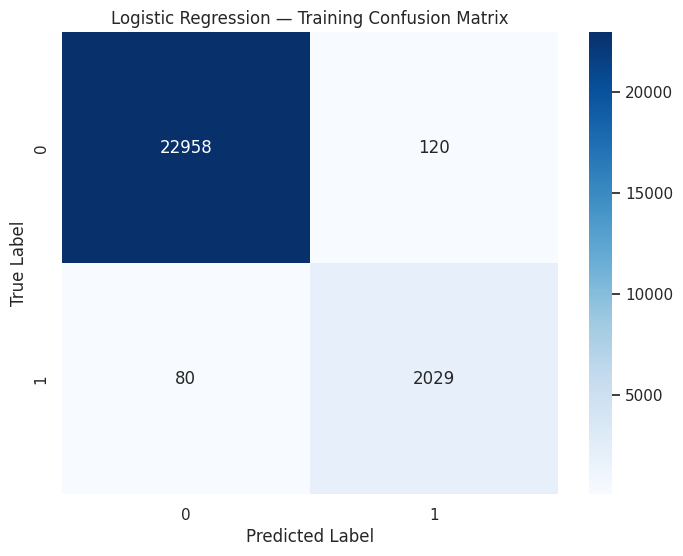


Classification Report (Training):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     23078
           1       0.94      0.96      0.95      2109

    accuracy                           0.99     25187
   macro avg       0.97      0.98      0.97     25187
weighted avg       0.99      0.99      0.99     25187



In [ ]:
cm_train = confusion_matrix(y_train, y_train_pred_log)

plt.figure(figsize=(8,6))
sns.heatmap(cm_train, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression — Training Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nClassification Report (Training):")
print(classification_report(y_train, y_train_pred_log))

Test Confusion Matrix

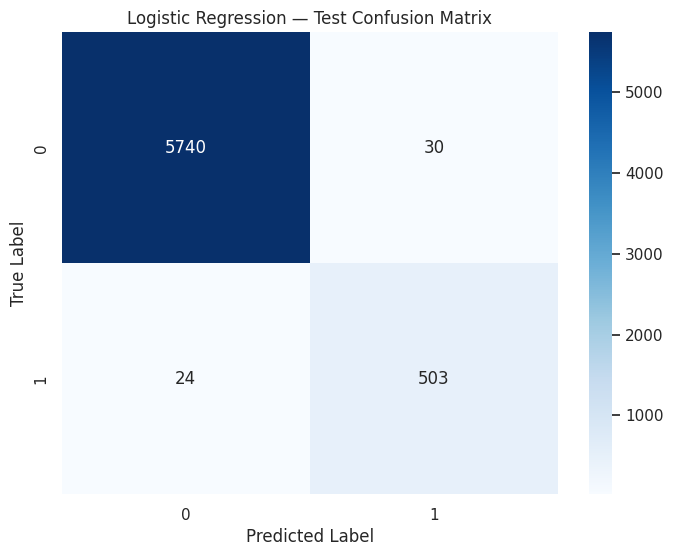


Logistic Regression (Test):
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      5770
           1       0.94      0.95      0.95       527

    accuracy                           0.99      6297
   macro avg       0.97      0.97      0.97      6297
weighted avg       0.99      0.99      0.99      6297



In [ ]:
cm_test = confusion_matrix(y_test, y_test_pred_log)

plt.figure(figsize=(8,6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title("Logistic Regression — Test Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("\nLogistic Regression (Test):")
print(classification_report(y_test, y_test_pred_log))


# Support Vector Classification


Creating the Model and Training

In [ ]:
model_svc_poly = SVC(kernel='poly', C=1E3)
model_svc_poly.fit(X_train_scaled, y_train)

# Make predictions on the test set
predicted_svc_poly = model_svc_poly.predict(X_test)

# Evaluate the model using regression metrics
mse_poly = mean_squared_error(y_test, predicted_svc_poly)

print(f"Mean Squared Error (MSE): {mse_poly}")

Mean Squared Error (MSE): 0.040813085596315704


In [ ]:
model_svc_sigmoid = SVC(kernel='sigmoid', C=1E3)
model_svc_sigmoid.fit(X_train_scaled, y_train)

# Make predictions on the test set
predicted_svc_sigmoid = model_svc_sigmoid.predict(X_test)

# Evaluate the model using regression metrics
mse_sigmoid = mean_squared_error(y_test, predicted_svc_sigmoid)

print(f"Mean Squared Error (MSE): {mse_sigmoid}")

Mean Squared Error (MSE): 0.08369064633952676


In [ ]:
model_svc_rbf = SVC(kernel='rbf', C=1E3)
model_svc_rbf.fit(X_train_scaled, y_train)

# Make predictions on the test set
predicted_svc_rbf = model_svc_rbf.predict(X_test)

# Evaluate the model using regression metrics
mse_rbf = mean_squared_error(y_test, predicted_svc_rbf)

print(f"Mean Squared Error (MSE): {mse_rbf}")

Mean Squared Error (MSE): 0.047482928378592984


In [ ]:
model_svc_linear = SVC(kernel='rbf', C=1E3)
model_svc_linear.fit(X_train_scaled, y_train)

# Make predictions on the test set
predicted_svc_linear = model_svc_linear.predict(X_test)

# Evaluate the model using regression metrics
mse_linear = mean_squared_error(y_test, predicted_svc_linear)

print(f"Mean Squared Error (MSE): {mse_linear}")

Mean Squared Error (MSE): 0.047482928378592984


Results and Comparisons

Training Poly Kern

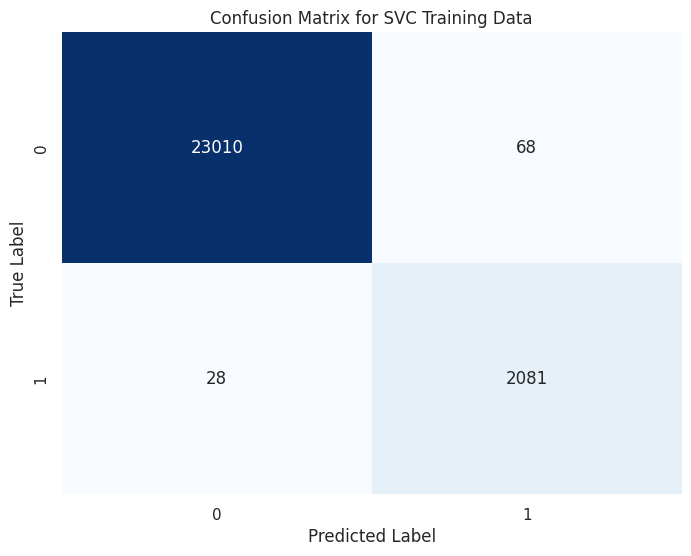


Classification Report for SVC Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23078
           1       0.97      0.99      0.98      2109

    accuracy                           1.00     25187
   macro avg       0.98      0.99      0.99     25187
weighted avg       1.00      1.00      1.00     25187



In [ ]:
# Get predictions for the training data
y_train_pred_svc = model_svc_poly.predict(X_train_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_svc_poly.classes_, yticklabels=model_svc_poly.classes_)
plt.title('Confusion Matrix for Poly Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report for Poly Training Data:")
print(classification_report(y_train, y_train_pred_svc))

Test Poly Kern

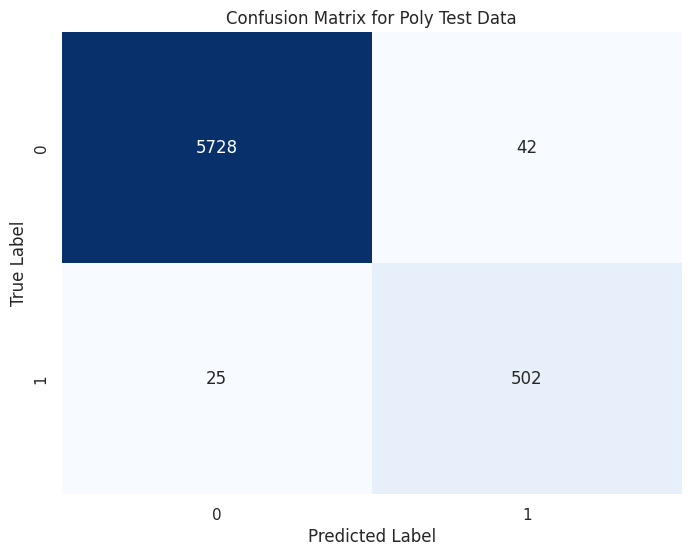


Classification Report for Poly Test Data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5770
           1       0.92      0.95      0.94       527

    accuracy                           0.99      6297
   macro avg       0.96      0.97      0.97      6297
weighted avg       0.99      0.99      0.99      6297



In [ ]:
# Make predictions on the scaled test set
y_test_pred_svc = model_svc_poly.predict(X_test_scaled)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_svc_poly.classes_, yticklabels=model_svc_poly.classes_)
plt.title('Confusion Matrix for Poly Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report for Poly Test Data:")
print(classification_report(y_test, y_test_pred_svc))

Train Sig Kern

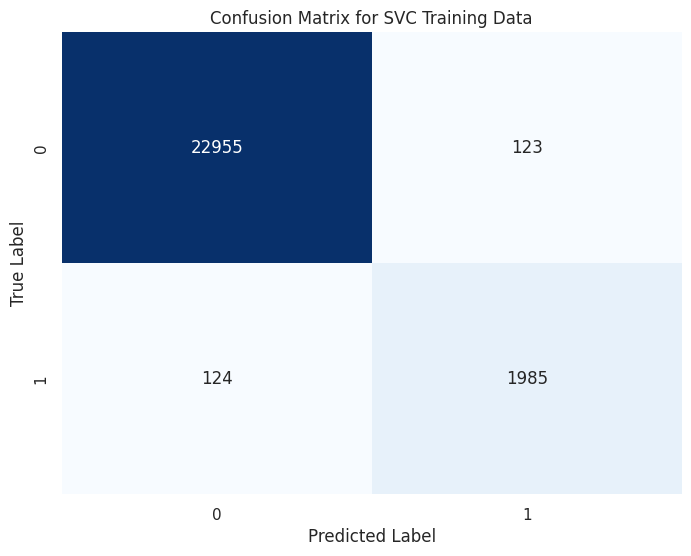


Classification Report for SVC Training Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     23078
           1       0.94      0.94      0.94      2109

    accuracy                           0.99     25187
   macro avg       0.97      0.97      0.97     25187
weighted avg       0.99      0.99      0.99     25187



In [ ]:
# Get predictions for the training data
y_train_pred_svc = model_svc_sigmoid.predict(X_train_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_svc_sigmoid.classes_, yticklabels=model_svc_sigmoid.classes_)
plt.title('Confusion Matrix for Sig Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report for Sig Training Data:")
print(classification_report(y_train, y_train_pred_svc))

Test Sig Kern

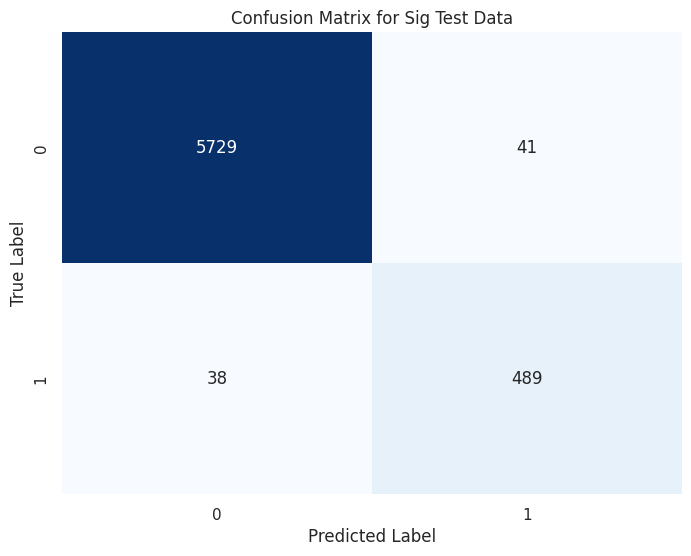


Classification Report for Sig Test Data:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      5770
           1       0.92      0.93      0.93       527

    accuracy                           0.99      6297
   macro avg       0.96      0.96      0.96      6297
weighted avg       0.99      0.99      0.99      6297



In [ ]:
# Make predictions on the scaled test set
y_test_pred_svc = model_svc_sigmoid.predict(X_test_scaled)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_svc_sigmoid.classes_, yticklabels=model_svc_sigmoid.classes_)
plt.title('Confusion Matrix for Sig Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report for Sig Test Data:")
print(classification_report(y_test, y_test_pred_svc))

Train Linear Kern

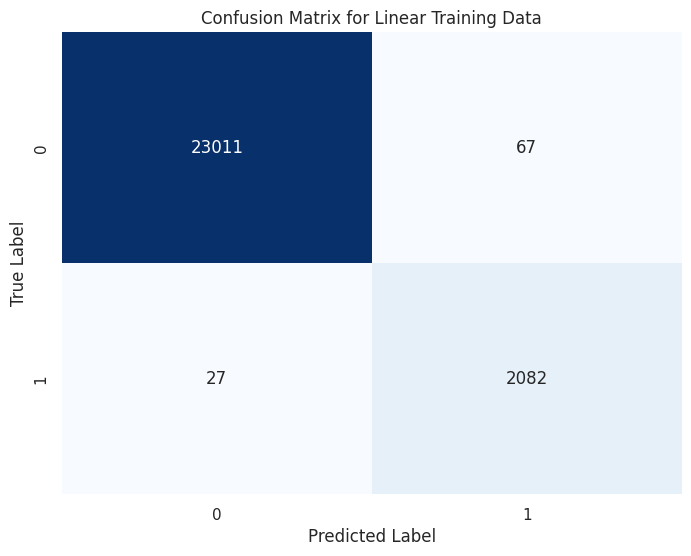


Classification Report for Linear Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23078
           1       0.97      0.99      0.98      2109

    accuracy                           1.00     25187
   macro avg       0.98      0.99      0.99     25187
weighted avg       1.00      1.00      1.00     25187



In [ ]:
# Get predictions for the training data
y_train_pred_svc = model_svc_linear.predict(X_train_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_svc_linear.classes_, yticklabels=model_svc_linear.classes_)
plt.title('Confusion Matrix for Linear Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report for Linear Training Data:")
print(classification_report(y_train, y_train_pred_svc))

Test Linear Kern

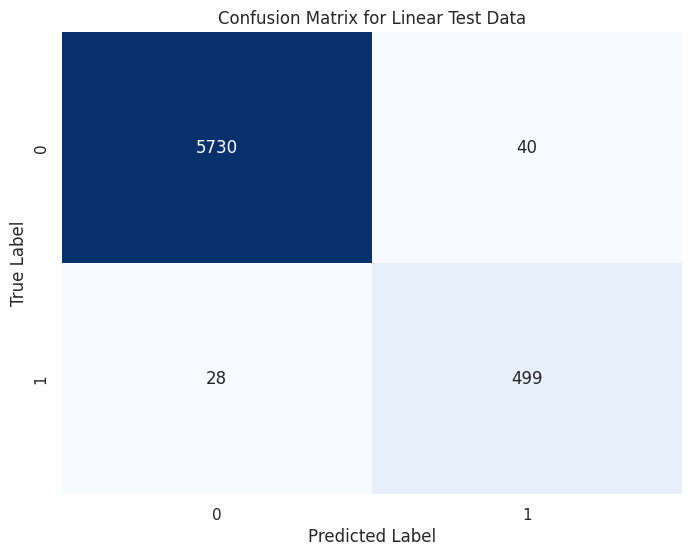


Classification Report for Linear Test Data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5770
           1       0.93      0.95      0.94       527

    accuracy                           0.99      6297
   macro avg       0.96      0.97      0.97      6297
weighted avg       0.99      0.99      0.99      6297



In [ ]:
# Make predictions on the scaled test set
y_test_pred_svc = model_svc_linear.predict(X_test_scaled)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_svc_linear.classes_, yticklabels=model_svc_linear.classes_)
plt.title('Confusion Matrix for Linear Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report for Linear Test Data:")
print(classification_report(y_test, y_test_pred_svc))

Train RBF Kern

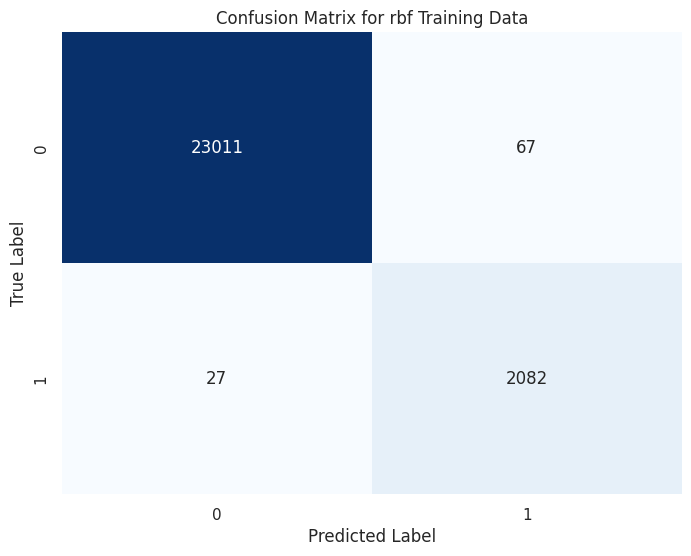


Classification Report for rbf Training Data:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     23078
           1       0.97      0.99      0.98      2109

    accuracy                           1.00     25187
   macro avg       0.98      0.99      0.99     25187
weighted avg       1.00      1.00      1.00     25187



In [ ]:
# Get predictions for the training data
y_train_pred_svc = model_svc_rbf.predict(X_train_scaled)

# Generate the confusion matrix
cm = confusion_matrix(y_train, y_train_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_svc_rbf.classes_, yticklabels=model_svc_rbf.classes_)
plt.title('Confusion Matrix for rbf Training Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report for rbf Training Data:")
print(classification_report(y_train, y_train_pred_svc))

Test RBF Kern

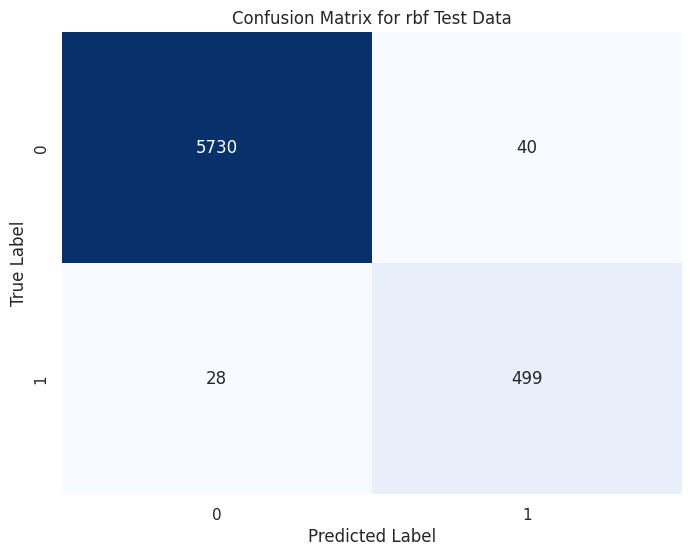


Classification Report for rbf Test Data:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      5770
           1       0.93      0.95      0.94       527

    accuracy                           0.99      6297
   macro avg       0.96      0.97      0.97      6297
weighted avg       0.99      0.99      0.99      6297



In [ ]:
# Make predictions on the scaled test set
y_test_pred_svc = model_svc_rbf.predict(X_test_scaled)

# Generate the confusion matrix
cm_test = confusion_matrix(y_test, y_test_pred_svc)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=model_svc_rbf.classes_, yticklabels=model_svc_rbf.classes_)
plt.title('Confusion Matrix for rbf Test Data')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print the classification report
print("\nClassification Report for rbf Test Data:")
print(classification_report(y_test, y_test_pred_svc))

# Random Forest

Creating the Model

Running the Training

--- Starting Random Forest Classifier Training ---

[Step 1/3] Loading features from cnn_extracted_features.npz...
Successfully loaded 25187 training samples and 6297 test samples.
Feature vector size: 128

[Step 2/3] Building and Training Random Forest model...
Training complete.

[Step 3/3] Evaluating model on the holdout test set...


--- === RANDOM FOREST PERFORMANCE REPORT === ---
               precision    recall  f1-score   support

Negative (NP)       1.00      0.99      1.00      5770
Positive (PP)       0.95      0.96      0.95       527

     accuracy                           0.99      6297
    macro avg       0.97      0.98      0.97      6297
 weighted avg       0.99      0.99      0.99      6297

Random Forest AUC-ROC Score: 0.9963


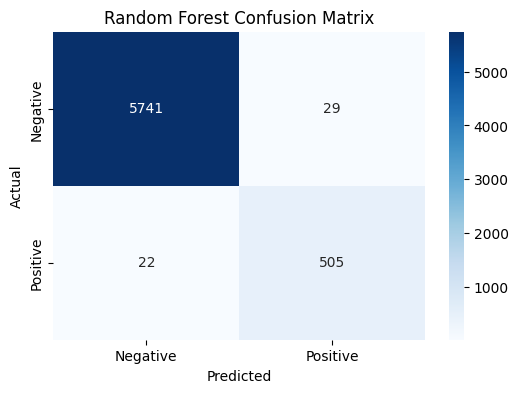

--- --- --- --- --- --- --- --- --- --- --- --- --- --- ---


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define the Plotting Function

def plot_confusion_matrix(y_true, y_pred, title):
    """
    Creates and displays a confusion matrix plot.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Negative', 'Positive'],
                yticklabels=['Negative', 'Positive'])
    plt.title(title)
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()

# Main Workflow

def main():
    print("--- Starting Random Forest Classifier Training ---")

    # Load Extracted Features
    NPZ_FILE = "cnn_extracted_features.npz"

    if not os.path.exists(NPZ_FILE):
        print(f"\n!!! ERROR: File not found: '{NPZ_FILE}' !!!")
        return

    print(f"\n[Step 1/3] Loading features from {NPZ_FILE}...")

    data = np.load(NPZ_FILE)
    X_train = data['X_train_features']
    y_train = data['y_train_labels']
    X_test = data['X_test_features']
    y_test = data['y_test_labels']

    print(f"Successfully loaded {len(X_train)} training samples and {len(X_test)} test samples.")
    print(f"Feature vector size: {X_train.shape[1]}")

    # Build and Train Random Forest
    print("\n[Step 2/3] Building and Training Random Forest model...")

    rf_model = RandomForestClassifier(
        n_estimators=500,
        class_weight='balanced',
        random_state=42,
        n_jobs=-1
    )

    # Train the model on the 128-feature vectors
    rf_model.fit(X_train, y_train)
    print("Training complete.")

    # Evaluate the Model
    print("\n[Step 3/3] Evaluating model on the holdout test set...")

    # Get class predictions (0 or 1)
    y_pred_class_rf = rf_model.predict(X_test)

    # Get prediction probabilities (for AUC score)
    y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

    # FINAL RESULTS
    print("\n\n--- === RANDOM FOREST PERFORMANCE REPORT === ---")

    print(classification_report(y_test, y_pred_class_rf, target_names=['Negative (NP)', 'Positive (PP)']))
    print(f"Random Forest AUC-ROC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")
    plot_confusion_matrix(y_test, y_pred_class_rf, "Random Forest Confusion Matrix")
    print("--- --- --- --- --- --- --- --- --- --- --- --- --- --- ---")


# Run the main workflow
if __name__ == "__main__":
    main()